In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import time
from datetime import datetime, timedelta
from time import mktime
from statsmodels.regression.linear_model import OLSResults

In [23]:
data = pd.read_csv('ignition_data_9_9.csv')
data['pub_date_struct'] = data.apply(lambda x: time.strptime(x['pub_date'],"%Y-%m-%d %H:%M:%S.%f%z"),axis=1)
data.index = data.apply(lambda x: datetime.fromtimestamp(mktime(x['pub_date_struct'])),axis=1)
data['hour'] = data.apply(lambda x: str(time.strptime(x['pub_date'],"%Y-%m-%d %H:%M:%S.%f%z")[3]), axis=1)
data['day_of_week'] = data.index.map(lambda x: x.weekday())
data['hour'] = pd.Categorical(
    data['hour'], categories=list(range(24)))
data['day_of_week'] = pd.Categorical(
    data['day_of_week'], categories=list(range(7)))
hour_dummies = pd.get_dummies(data['hour'], drop_first=True)
hour_dummies.columns = ['h'+ str(elem) for elem in hour_dummies.columns]
day_of_week_dummies = pd.get_dummies(data['day_of_week'], drop_first=True)
day_of_week_dummies.columns = ['dow'+str(elem) for elem in day_of_week_dummies.columns]
data = pd.concat((data,hour_dummies,day_of_week_dummies), axis=1)

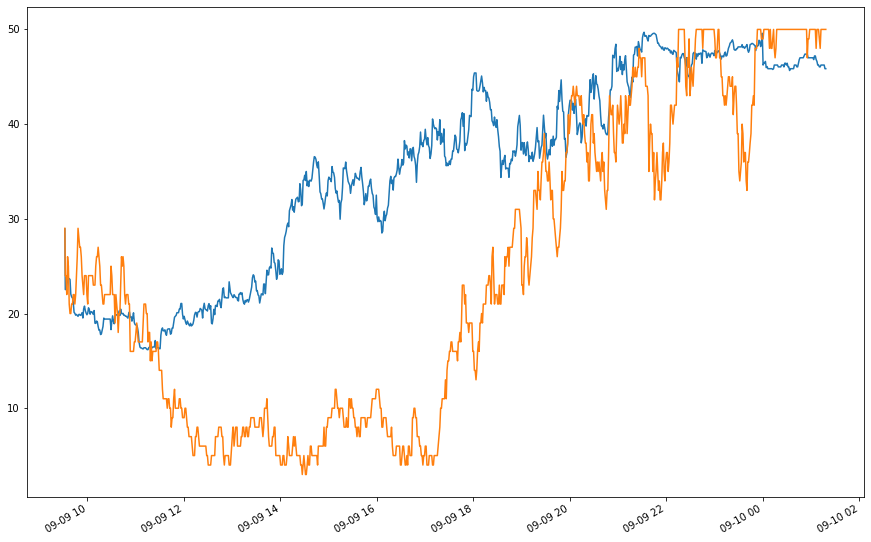

In [25]:
new_results = OLSResults.load("ols_9_21_data.pickle")
new_preds = new_results.predict(data)
new_preds[:].plot()
data['num_players_50'][:].plot(figsize=(15,10))

In [27]:
print(new_preds.shape)

(948,)
